In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import scipy.stats as stats

In [3]:
#df = pd.read_csv(r"C:\Users\khannaa3\Desktop\Data Incubator\Goodreads Dataset\GoodReads_100k_books.csv")

df

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119
6,Jeffrey Pfeffer,Paperback,"""Competitive Advantage Through People"" explore...","Business,Leadership,Business,Management,Romanc...",https://i.gr-assets.com/images/S/compressed.ph...,087584717X,9.78E+12,https://goodreads.com/book/show/1001092.Compet...,304,3.65,1,Competitive Advantage Through People: Unleashi...,20
7,Edward Joesting,Paperback,"""Even if you know Hawaiian history you will fi...","History,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,393009076,9.78E+12,https://goodreads.com/book/show/1001126.Hawaii,353,3.93,2,Hawaii: An Uncommon History,15
8,Nick Le Neve Walmsley,Paperback,At the time of her construction in the late 19...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,752456830,9.78E+12,https://goodreads.com/book/show/10011431-r101,160,5.00,2,R101: A Pictorial History,3
9,"B. Alan Wallace,Dalai Lama XIV",Hardcover,"Discover your personal path to bliss,""This boo...","Religion,Buddhism,Philosophy,Spirituality,Psyc...",https://i.gr-assets.com/images/S/compressed.ph...,047146984X,9.78E+12,https://goodreads.com/book/show/100114.Genuine...,256,4.10,7,Genuine Happiness: Meditation as the Path to F...,133


In [4]:
#Be aware of missing values
df.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

In [5]:
## First part: See if there is a difference in ratings based on the gender identity of the protagonist or author.

#Remove Nans from genre column 
df.dropna(subset = ['desc', 'rating'])

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119
6,Jeffrey Pfeffer,Paperback,"""Competitive Advantage Through People"" explore...","Business,Leadership,Business,Management,Romanc...",https://i.gr-assets.com/images/S/compressed.ph...,087584717X,9.78E+12,https://goodreads.com/book/show/1001092.Compet...,304,3.65,1,Competitive Advantage Through People: Unleashi...,20
7,Edward Joesting,Paperback,"""Even if you know Hawaiian history you will fi...","History,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,393009076,9.78E+12,https://goodreads.com/book/show/1001126.Hawaii,353,3.93,2,Hawaii: An Uncommon History,15
8,Nick Le Neve Walmsley,Paperback,At the time of her construction in the late 19...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,752456830,9.78E+12,https://goodreads.com/book/show/10011431-r101,160,5.00,2,R101: A Pictorial History,3
9,"B. Alan Wallace,Dalai Lama XIV",Hardcover,"Discover your personal path to bliss,""This boo...","Religion,Buddhism,Philosophy,Spirituality,Psyc...",https://i.gr-assets.com/images/S/compressed.ph...,047146984X,9.78E+12,https://goodreads.com/book/show/100114.Genuine...,256,4.10,7,Genuine Happiness: Meditation as the Path to F...,133


In [6]:
#Feature Extraction: Gender identity of the author or protagonist. Search the book summary for "her", "his", or " their " to get info on gender identity of subject  
 
herString = ' her '

herIndices = df['desc'].str.find(herString)
girlBooks = []
for i, x in enumerate(herIndices):
    if x >= 0:
        girlBooks.append(i)

hisString = ' his '
hisIndices = df['desc'].str.find(hisString)
boyBooks = []
for i, x in enumerate(hisIndices):
    if x >= 0:
        boyBooks.append(i)    
        
theirString = ' their '

theirIndices = df['desc'].str.find(theirString)
theirBooks = []
for i, x in enumerate(theirIndices):
    if x >= 0:
        theirBooks.append(i)

In [7]:
#Exclude intersections of these three lists. 

justGirlsBooks = [x for x in girlBooks if x not in boyBooks]
justBoysBooks = [x for x in boyBooks if x not in girlBooks]
justTheirBooks = [x for x in theirBooks if x not in boyBooks]
justTheirBooks = [x for x in justTheirBooks if x not in girlBooks] 

In [11]:
#Find means for all groups 

rateBoys = np.mean(df['rating'][justBoysBooks])
rateGirls = np.mean(df['rating'][justGirlsBooks])
rateThem = np.mean(df['rating'][justTheirBooks])
rateBoys, rateGirls, rateThem


(3.888809273422556, 3.8610512618296595, 3.8458987161198275)

In [10]:
#Find Medians for all groups

medianBoys = np.median(df['rating'][justBoysBooks])
medianGirls = np.median(df['rating'][justGirlsBooks])
medianThem = np.median(df['rating'][justTheirBooks])
medianBoys, medianGirls, medianThem


(3.93, 3.89, 3.93)

In [12]:
#Find Std for all groups

sdBoys = np.std(df['rating'][justBoysBooks])
sdGirls = np.std(df['rating'][justGirlsBooks])
sdThem = np.std(df['rating'][justTheirBooks])
sdBoys, sdGirls, sdThem

(0.4517493636120999, 0.37094268676912334, 0.634597237460838)

((array([-3.98931147, -3.77369397, -3.65573248, ...,  3.65573248,
          3.77369397,  3.98931147]), array([0., 0., 0., ..., 5., 5., 5.])),
 (0.395339030718509, 3.888809273422562, 0.8749686781311761))

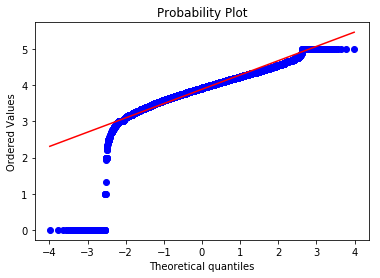

In [13]:
#Test for normality 
stats.probplot(df['rating'][justBoysBooks], dist = 'norm', plot = plt)
#DATA IS NOT NORMALLY DISTRIBUTED... SO USE kruskal-wallis test instead

In [14]:
stats.kruskal(df['rating'][justBoysBooks], df['rating'][justGirlsBooks], df['rating'][justTheirBooks])
#There is a statistically significant difference between the medians of these populations, 
#books with female author/protagonists have a lower median but by a miniscule amount (0.04 points)

KruskalResult(statistic=114.92266297525136, pvalue=1.1088193906110984e-25)

<function matplotlib.pyplot.show(*args, **kw)>

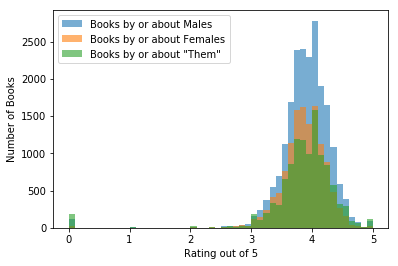

In [15]:
plt.hist(df['rating'][justBoysBooks], bins = 50, label = 'Books by or about Males', alpha = 0.6)
plt.hist(df['rating'][justGirlsBooks], bins = 50, label = 'Books by or about Females', alpha = 0.6)
plt.hist(df['rating'][justTheirBooks], bins = 50, label = 'Books by or about "Them"', alpha = 0.6)
plt.legend(loc='best')
plt.xlabel('Rating out of 5')
plt.ylabel('Number of Books')
plt.show